In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data set/titanic (1).csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# Label encoding for multiple columns using apply
cols_to_encode = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
for col in cols_to_encode:
    df[col] = pd.factorize(df[col])[0]

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22.0,1,0,0,7.2500,-1,0
1,2,1,1,1,1,38.0,1,0,1,71.2833,0,1
2,3,1,3,2,1,26.0,0,0,2,7.9250,-1,0
3,4,1,1,3,1,35.0,1,0,3,53.1000,1,0
4,5,0,3,4,0,35.0,0,0,4,8.0500,-1,0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.dropna()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22.0,1,0,0,7.2500,-1,0
1,2,1,1,1,1,38.0,1,0,1,71.2833,0,1
2,3,1,3,2,1,26.0,0,0,2,7.9250,-1,0
3,4,1,1,3,1,35.0,1,0,3,53.1000,1,0
4,5,0,3,4,0,35.0,0,0,4,8.0500,-1,0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','Survived']]

In [ ]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0,22.0,7.2500,0,0
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,1
4,3,0,35.0,8.0500,0,0


In [ ]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = df['Survived']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Model building


1. LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
pred_logistic = logistic.predict(x_test)

 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
pred_tree = tree.predict(x_test)

RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

forest = RandomForestClassifier()
forest.fit(x_train, y_train)
pred_rf = forest.predict(x_test)

In [ ]:
print("Tree R2:", r2_score(y_test, pred_tree))
print("RF R2:", r2_score(y_test, pred_rf))
print("Logistic R2:", r2_score(y_test, pred_logistic))

Tree R2: -0.20340722495894914
RF R2: 0.0020525451559932906
Logistic R2: -0.11535303776683103


 Define evaluation function

In [ ]:

def evaluate_model(name, y_true, y_pred):
    print(f"\n {name}")
    print(" Accuracy:", accuracy_score(y_true, y_pred))
    print(" Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(" Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 60)


Evaluate each model

In [ ]:


evaluate_model("Logistic Regression", y_test, pred_logistic)
evaluate_model("Decision Tree Classifier", y_test, pred_tree)
evaluate_model("Random Forest Classifier", y_test, pred_rf)


 Logistic Regression
 Accuracy: 0.7342657342657343
 Confusion Matrix:
 [[68 19]
 [19 37]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        87
           1       0.66      0.66      0.66        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143

------------------------------------------------------------

 Decision Tree Classifier
 Accuracy: 0.7132867132867133
 Confusion Matrix:
 [[67 20]
 [21 35]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77        87
           1       0.64      0.62      0.63        56

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.71      0.71      0.71       143

------------------------------------------------

Step 1: Calculate accuracy scores for all models
 Step 2: Plot accuracy comparison bar chart

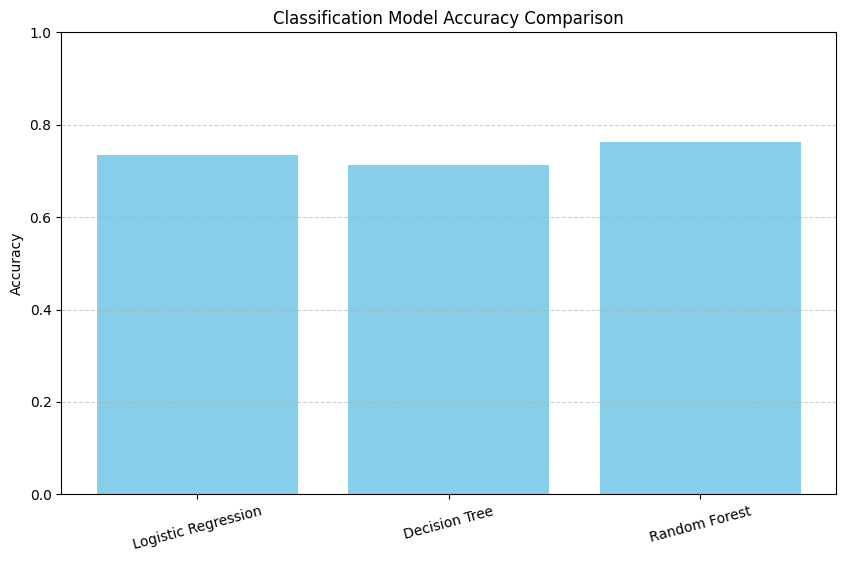

In [ ]:

accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, pred_logistic),
    "Decision Tree": accuracy_score(y_test, pred_tree),
    "Random Forest": accuracy_score(y_test, pred_rf)
}


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title("Classification Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()